# Python Machine Learning Hw#2
## Part I: MNIST

### 1. Load the MNIST dataset, and split it into a training set, a validation set, and a test set: 50,000 instances for training, 10,000 for validation, and 10,000 for testing. 

#### Load the MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", parser='auto')
X_data = mnist['data']
y_data = mnist['target']

print('X_data: ' + str(X_data.shape))

X_data: (70000, 784)


#### Plotting the MNIST dataset

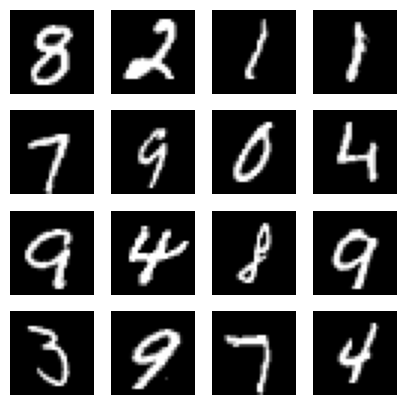

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4, 4, figsize = (5,5))
for row in axes:
    for axe in row:
        index = np.random.randint(70000)
        img = X_data.values[index].reshape(28,28)
        cloths = y_data.astype('int')[index]
        axe.imshow(img, cmap='gray')
        axe.set_axis_off()

#### Preprocessing

##### Normalization

In [3]:
X_data /= 255

##### Dimensionality reduction (PCA)

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=196)
X_data = pca.fit_transform(X_data)

print(X_data.shape)

(70000, 196)


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# def reconstruction(X, n, trans):
#     """
#     Creates a reconstruction of an input record, X, using the topmost (n) vectors from the
#     given transformation (trans)

#     Note 1: In this dataset each record is the set of pixels in the image (flattened to
#     one row).
#     Note 2: X should be normalized before input.
#     """
#     vectors = [trans.components_[n] * X[n] for n in range(0, n)]

#     # Invert the PCA transformation.
#     ret = trans.inverse_transform(X)

#     # This process results in non-normal noise on the margins of the data.
#     # We clip the results to fit in the [0, 1] interval.
#     ret[ret < 0] = 0
#     ret[ret > 1] = 1
#     return ret

# fig, axes = plt.subplots(4, 4, figsize = (5,5))
# for row in axes:
#     for axe in row:
#         index = np.random.randint(70000)
#         img = reconstruction(X_data[index, :], 196, pca).reshape((28, 28))
#         cloths = y_data.astype('int')[index]
#         axe.imshow(img, cmap='gray')
#         axe.set_axis_off()

##### Split it into a training set, validation set

In [5]:
from sklearn.model_selection import train_test_split
seed = 68
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=seed, test_size=1/7)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, random_state=seed, test_size=1/6)

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_validation: ' + str(X_validation.shape))
print('Y_validation: ' + str(y_validation.shape))
print('X_test: ' + str(X_test.shape))
print('Y_test: ' + str(y_test.shape))

X_train: (50000, 196)
Y_train: (50000,)
X_validation: (10000, 196)
Y_validation: (10000,)
X_test: (10000, 196)
Y_test: (10000,)


##### Data Augmentation

In [6]:
from keras.preprocessing.image import  ImageDataGenerator

# Reference
# https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/1.0-image-augmentation.ipynb

X_train = X_train.reshape((-1, 14, 14, 1))

image_data_generator = ImageDataGenerator(
    width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
)
image_data_generator.fit(X_train)

print(X_train.shape)

steps_per_epoch = 1000
epoch = 1
count = 0

for X_batch, y_batch in image_data_generator.flow(X_train, y_train, batch_size=32, seed=seed):
    X_train = np.append(X_train, X_batch, axis=0)
    y_train = np.append(y_train, y_batch, axis=0)

    if count > steps_per_epoch * epoch:
        break

    count += 1

print(X_train.shape)

X_train = X_train.reshape((-1, 196))

(50000, 14, 14, 1)
(82064, 14, 14, 1)


### 2. Then train various classifiers: E.g. one Random Forest classifier, one Extra-Trees classifier, and one SVM classifier, etc.

#### Random Forest classifier

In [ ]:
# training random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

In [ ]:
# precting the random forest
from sklearn.metrics import classification_report, confusion_matrix
print("Score")
print(rf.score(X_validation, y_validation))

pred=rf.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))


#### Extra-Trees classifier

In [ ]:
# training extra-tree
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1)
et.fit(X_train, y_train)

In [ ]:
# precting the random forest
from sklearn.metrics import classification_report, confusion_matrix
pred=et.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

#### SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm = SVC(probability=True)
svm.fit(X_train, y_train)

In [ ]:
# precting the svm
from sklearn.metrics import classification_report, confusion_matrix
pred=svm.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

#### KNN Classifier

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
kVals = range(1, 30, 2)
accuracies = []

for k in kVals:
    # train the classifier with the current value of `k`
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    score = knn.score(X_validation, y_validation)
    accuracies.append(score)

i = np.argmax(accuracies)
knn = KNeighborsClassifier(n_neighbors=kVals[i])
knn.fit(X_train, y_train)

In [ ]:
# precting the knn
from sklearn.metrics import classification_report, confusion_matrix
pred=knn.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))

### Next, try to **combine these classifiers into an ensemble** that outperforms each individual classifier on the validation set, using **soft voting**. Once you have found one, try it on the test set.

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = [
    ("random_forest", rf),
    ("extra_tress", et),
    ("svm", svm),
    ("knn", knn)
]

soft_voting_ensemble = VotingClassifier (estimators, voting="soft")
soft_voting_ensemble.fit(X_train, y_train)

In [ ]:
# precting the soft_voting_ensemble
from sklearn.metrics import classification_report, confusion_matrix
pred=soft_voting_ensemble.predict(X_validation)
print ("Classification Report")
print(classification_report(y_validation, pred))
print ("Confusion Report")
print(confusion_matrix(y_validation, pred))